Determinando solução analítica da cinemática direta da perna robótica:
* Simulação das juntas robóticas
* Determinação das coordenadas finais conforme limitações angulares de cada junta e/ou motor

In [ ]:
import sympy as sp

# Definindo os símbolos para os parâmetros DH
theta1, theta2, theta3, l1, l2, l3 = sp.symbols('θ1 θ2 θ3 L_1 L_2 L_3')

# Definindo os parâmetros DH (theta, d, a, alpha)
DH_parameters = [
    (theta1, 0, 0, sp.pi/2),
    (0, l1, 0, 0),
    (theta2, 0, l2, 0),
    (theta3, 0, l3, 0)
]

# Função para calcular a matriz de transformação DH
def dh_transform(theta, d, a, alpha):
    return sp.Matrix([
        [sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha), a*sp.cos(theta)],
        [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha), a*sp.sin(theta)],
        [0, sp.sin(alpha), sp.cos(alpha), d],
        [0, 0, 0, 1]
    ])

# Função para calcular a matriz de transformação total
def total_transform(DH_parameters):
    T = sp.eye(4)  # Matriz identidade
    for params in DH_parameters:
        T_i = dh_transform(*params)
        T = T * T_i
    return T

T_total = total_transform(DH_parameters)

# Imprimir a matriz de forma mais legível
latex_result = sp.latex(T_total[:, 3])
print("Matriz de transformação final:")
print(latex_result)



Matriz de transformação final:
\left[\begin{matrix}L_{1} \sin{\left(θ_{1} \right)} + L_{2} \cos{\left(θ_{1} \right)} \cos{\left(θ_{2} \right)} - L_{3} \sin{\left(θ_{2} \right)} \sin{\left(θ_{3} \right)} \cos{\left(θ_{1} \right)} + L_{3} \cos{\left(θ_{1} \right)} \cos{\left(θ_{2} \right)} \cos{\left(θ_{3} \right)}\\- L_{1} \cos{\left(θ_{1} \right)} + L_{2} \sin{\left(θ_{1} \right)} \cos{\left(θ_{2} \right)} - L_{3} \sin{\left(θ_{1} \right)} \sin{\left(θ_{2} \right)} \sin{\left(θ_{3} \right)} + L_{3} \sin{\left(θ_{1} \right)} \cos{\left(θ_{2} \right)} \cos{\left(θ_{3} \right)}\\L_{2} \sin{\left(θ_{2} \right)} + L_{3} \sin{\left(θ_{2} \right)} \cos{\left(θ_{3} \right)} + L_{3} \sin{\left(θ_{3} \right)} \cos{\left(θ_{2} \right)}\\1\end{matrix}\right]


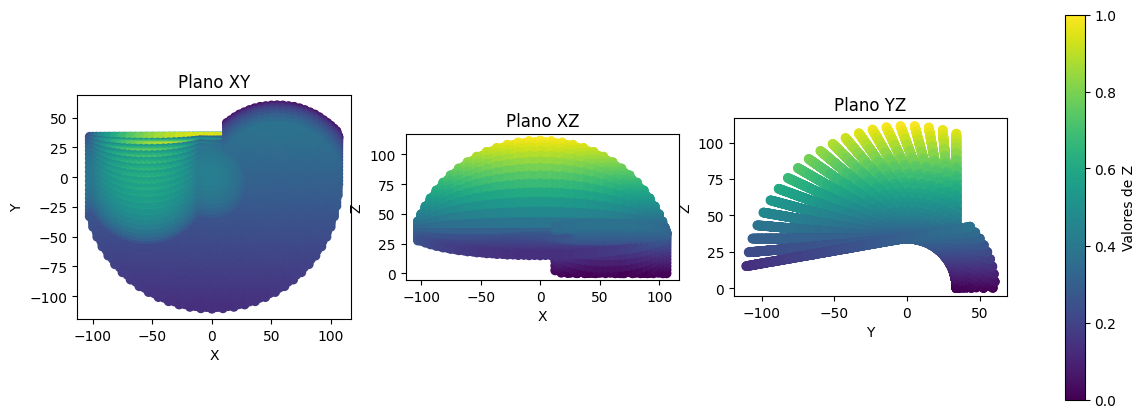

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

l1 = 34
l2 = 55
l3 = 55

stp = 5  # Número de passos para cálculo

# Listas para coordenadas
X_perna = []
Y_perna = []
Z_perna = []

rad = np.pi / 180

for t1 in range(0, 101, stp):
    for t2 in range(-90, 90, stp):
        for t3 in range(30, 150, stp):
            # Adicionar as coordenadas à lista apenas se X for positivo
            X = l1 * np.sin(t1 * rad) + l2 * np.cos(t1 * rad) * np.cos(t2 * rad) - l3 * np.sin(t2 * rad) * np.sin(t3 * rad) * np.cos(t1 * rad) + l3 * np.cos(t1 * rad) * np.cos(t2 * rad) * np.cos(t3 * rad)
            if X >= 0:
                X_perna.append(X)
                Y_perna.append(-l1 * np.cos(rad * t1) + l2 * np.sin(rad * t1) * np.cos(rad * t2) - l3 * np.sin(rad * t1) * np.sin(rad * t2) * np.sin(rad * t3) + l3 * np.sin(rad * t1) * np.cos(rad * t2) * np.cos(rad * t3))
                Z_perna.append(l2 * np.sin(rad * t2) + l3 * np.sin(rad * t2) * np.cos(rad * t3) + l3 * np.sin(rad * t3) * np.cos(rad * t2))

# plotando coordenadas

# Criar uma figura com três subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# trasformando as coordenadas para a orientação central
X_centro = Z_perna
Y_centro = [-i for i in Y_perna]
Z_centro = X_perna

# Plotando em XY
axs[0].scatter(X_centro, Y_centro, c=Z_centro, cmap='viridis')
axs[0].set_title('Plano XY')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_aspect('equal')

# Plotando em XZ
axs[1].scatter(X_centro, Z_centro, c=Z_centro, cmap='viridis')
axs[1].set_title('Plano XZ')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Z')
axs[1].set_aspect('equal')

# Plotando em YZ
axs[2].scatter(Y_centro, Z_centro, c=Z_centro, cmap='viridis')
axs[2].set_title('Plano YZ')
axs[2].set_xlabel('Y')
axs[2].set_ylabel('Z')
axs[2].set_aspect('equal')

plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=axs.ravel().tolist(), orientation='vertical', label='Valores de Z')

plt.show()
